<a href="https://colab.research.google.com/github/Caiof96/mvp-wine/blob/main/mvp_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Caio Machado Botelho Fucci

**Matrícula:** 4052025000217

**Dataset:**  [Wine Dataset](https://archive.ics.uci.edu/dataset/109/wine)

# Descrição do Problema

O conjunto de dados utilizados analisa vinhos produzidos a partir de diferentes cultivares vindos de uma mesma região da Itália. No dataset, os cultivares são representadas pela variável `class`, e receberam os nomes class_0, class_1 e class_2.

O objetivo desse MVP é analisar se conseguimos determinar o cultivar de um vinho baseado nas suas características.

## Hipóteses do problema

Vamos trabalhar com as seguintes hipóteses:

* O tipo do cultivar interfere no teor alcóolico do vinho?
* Algum cultivar se destaca por trazer maior acidez ao vinho?
* Existe uma correlação entre as teor de cinzas e teor de ácido presentes nos vinhos de um mesmo cultivar?
* É possível traçar relação entre os taninos e a intensidae da cor?

## Tipo de problema

Nesse caso, temos um problema de `classificação supervisionada`, uma vez que possuímos inicialmente os dados da saída desejada. Utilizando o aprendizado com as saídas desejadas, conseguimos criar um algoritmo que aprenda a regra para identificar o cultivar de vinhos produzidos futuramente, a aprtir de uma relação de caracteríticas informadas. Tal ação poderá ter diversas aplicabilidades entre elas, identificar possíveis adulterações em vinhos ou validar se o cultivar correto foi utilizado a fim de atender as regas de uma Denominação de Origem específica.

## Condições para Seleção de Dados
Para esse estudo buscou-se aproveitar a totalidade dos dados presentes no dataset, contudo priorizou-se analisar os dados de acidez, tanino, teor alcólico e cor, uma vez que são algumas das principais caracteríticas avaliadas pelos consumidores ao se degustar um vinho.


## Atributos do dataset

O dataset Wine escolhido contém 178 amostras, com os seguintes 14 atributos sendo analisados:

* `class`: cultivar
* `alcohol`: teor alcoolico
* `malicacid`: teor de ácido málico
* `ash`: teor de cinzas
* `alcalinity_of_ash`: alcalinidaed das cinzas
* `magnesium`: teor de magnésio
* `total_phenols`: composatos fenólicos
* `flavanoids`: flavonóides
* `nonflavanoid_phenols`: fenóis não flavonóides
* `proanthocyanins`: taninos
* `color_intensity`: intensidade da cor
* `hue`: coloração
* `0D280_0D315_of_diluted_wines`: concentração de proteínas
* `proline`: teor de prolina




# Importação das bibliotecas Necessárias e Carga de Dados
Primeiro, importou-se todas as bibliotecas a serem utilizadas no código para a análise dos dados, juntamente com o dataset que será utilizado.

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Carregamos o dataset
wine = load_wine()

# Criamos o dataframe
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['cultivar'] = wine.target_names[wine.target]

# Apresentar primeiras linhas
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cultivar
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


# Análise de Dados
Nesta etapa de Análise de Dados Exploratória sobre o dataset Iris Wine, visamos entender a distribuição, as relações e as características das variáveis, além de buscar um melhor entendimento de seus comprotamentos em cada cultivar, sendo esta um pré-requisito para melhor execução da etapas de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset possui 178 instâncias. A variável `class` é do tipo categórico, enquanto as outras variáveis são do tipo float.

In [ ]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 178

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline    

Partindo para uma análise da distribuição de cada cultivar dentro das instâncias:

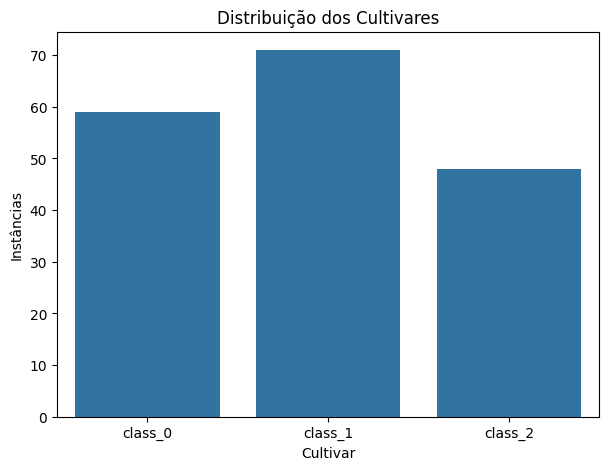

In [ ]:
plt.figure(figsize=(7, 5))

sns.countplot(x='cultivar', data=df)
plt.title('Distribuição dos Cultivares')
plt.xlabel('Cultivar')
plt.ylabel('Instâncias')
plt.show()

Dessa forma, é possível observar uma amostra maior de vinhos do cultivar 1, aumentando a confiabilidade das análises realizadas com esse cultivar, e uma amostra menor de vinhos dos cultivares 0 e 2. O total de instâncias de cada região é:


*   class_0: 59
*   class_1: 71
*   class_2: 48



## Estatísticas Descritivas
A estatística a seguir representa um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis, sendo útil para dar um avisão geral da distribuição dos dados amostrais.

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Média

Ao focarmos na Média temos um valor referente ao ponto de equilíbrio para cada característica do vinho, sendo esta medida influenciada por outliers, tonando necessários levantamentos estatísticos complementares.



In [ ]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
alcohol,13.000618
malic_acid,2.336348
ash,2.366517
alcalinity_of_ash,19.494944
magnesium,99.741573
total_phenols,2.295112
flavanoids,2.029270
nonflavanoid_phenols,0.361854
proanthocyanins,1.590899
color_intensity,5.058090


### Mediana
A mediana em complemento à Média, traz uma visão que busca excluir os outliers. Se compararmos os valroes apresentados pelas duas medidas identificamos uma maior divergência com relação à variável proline, levantando a possibilidade de existeirem outliers.

In [ ]:
df.describe().median()

,0
alcohol,13.025309
malic_acid,2.100674
ash,2.363258
alcalinity_of_ash,19.497472
magnesium,98.870787
total_phenols,2.325056
flavanoids,2.082135
nonflavanoid_phenols,0.350927
proanthocyanins,1.572949
color_intensity,4.874045


### Mínimo
Tal informação nos ajuda a visualizar o nosso limite inferior da nossa amostra, que dependendo da disância com relação a média e a mediana pode nos indicar a presença de outliers.

In [ ]:
df.describe().loc['min']

,min
alcohol,11.03
malic_acid,0.74
ash,1.36
alcalinity_of_ash,10.60
magnesium,70.00
total_phenols,0.98
flavanoids,0.34
nonflavanoid_phenols,0.13
proanthocyanins,0.41
color_intensity,1.28


### Máximo
Tal informação nos ajuda a visualizar o nosso limite superior da nossa amostra, que assim como  o mínimo pode nos ajudar a identificar a presença de outliers.

In [ ]:
df.describe().loc['max']

,max
alcohol,14.83
malic_acid,5.80
ash,3.23
alcalinity_of_ash,30.00
magnesium,162.00
total_phenols,3.88
flavanoids,5.08
nonflavanoid_phenols,0.66
proanthocyanins,3.58
color_intensity,13.00


### Desvio padrão
O desvio padrão é útil para verificarmos a dispersão dos valores amostrais em relação à média obtida, sendo que ao comparrarmos os valores obtidos nessa medida com os anteriores, compreendemos que há uma dispersão significativa para a maioria das nossas variáveis.

In [ ]:
df.describe().loc['std']

,std
alcohol,0.811827
malic_acid,1.117146
ash,0.274344
alcalinity_of_ash,3.339564
magnesium,14.282484
total_phenols,0.625851
flavanoids,0.998859
nonflavanoid_phenols,0.124453
proanthocyanins,0.572359
color_intensity,2.318286


## Teor Alcoólico
A fim de compreendermos se o teor alccólico resultante do vinho produzido po ser influenciado pelo cultivar de origem, utilizaremos o boxplots que nos dará uma visão gráfica das médias, medianas, e desvio padrão dos teores alcoólicos agrupados por tiupo de cultivar, assim como a confirmação de outliers nas amostras de cada grupo.

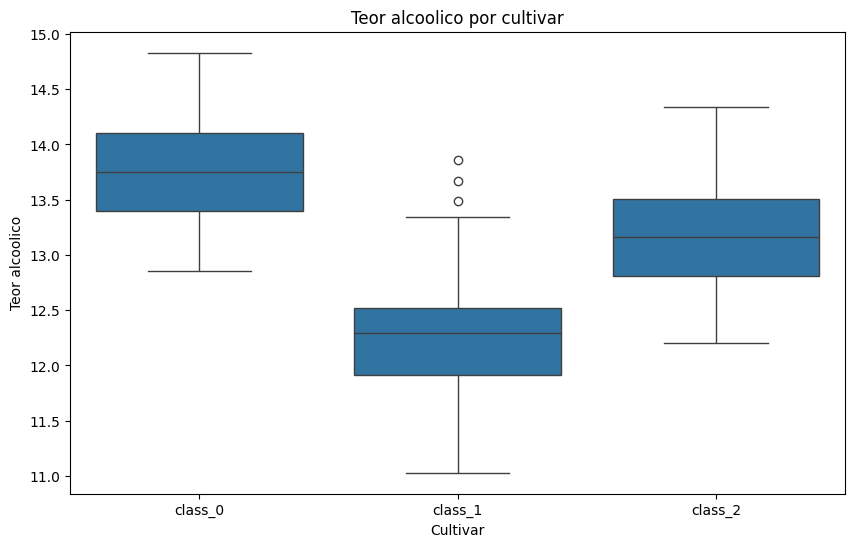

In [ ]:
# Boxplot do teor alcoolico por cultivar
plt.figure(figsize=(10, 6))
sns.boxplot(x='cultivar', y='alcohol', data=df)
plt.title('Teor alcoolico por cultivar')
plt.xlabel('Cultivar')
plt.ylabel('Teor alcoolico')
plt.show()

Como resultado do gráfico gerado, temos como tendência que o class_1 nos dará tores alcoólicos mais reduzidos, o clas_2 teores intermediários e class_0 teores mais elevados.

## Acidez
Assim como aplicado na análise do teor alcoólico, utilizaremos o boxplots para auxíliar na visualização de uma possível influência do tipo de cultivar em relação a acidez final do vinho.

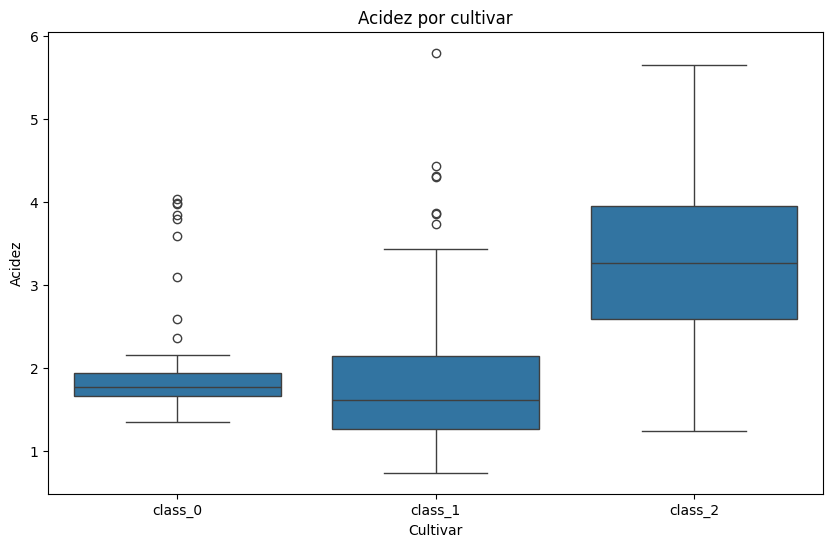

In [ ]:
# Boxplot da acidez por cultivar
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='cultivar', y='malic_acid', data=df)
plt.title('Acidez por cultivar')
plt.xlabel('Cultivar')
plt.ylabel('Acidez')
plt.show()

A partir a ilustração temos que o cultivar class_2 possui uma valor esperado para acidez mais elevado do que os demais.

## Matriz de correlação

Faremos uma análise de correlação entre as características analisadas dos vinhos para identificar possíveis correlações entre o teor de cinzas e a acidez e entre os taninos e a itnesidade das cores

In [16]:
print("\nMatriz de correlação entre as características do vinho")

df.iloc[:, :13].corr()


Matriz de correlação entre as características do vinho


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


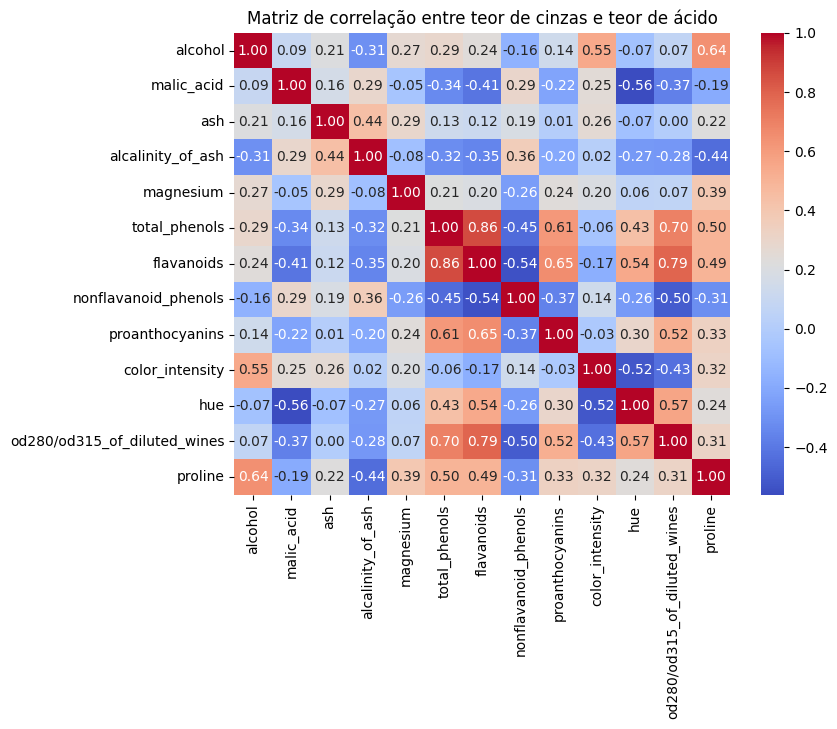

In [ ]:
plt.figure(figsize=(8, 6))
# Criando um mapa de calor indicando grau de correlação entre as variáveis
sns.heatmap(df.iloc[:, :13].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação entre teor de cinzas e teor de ácido')
plt.show()

Ao verificarmos a relação entre as caracterísitcas desejadas, não foi identificada forte relação entre elas. Contudo podemos verificar que outras caraterísticas possuem forte ligação como total_phenols e flavanoids.

## Identificação de Valores Nulos
Esta etapa consiste na identificação de possíveis valores nulos presentes no dataset, sendo necessário a realizar o tratamento adequado com esses dados a fim de melhorar a qualidade da amostra e facilitar a melhor execução de futuros algoritmo.


In [ ]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


A ação acima foi realizada a fim de confirmar a inexistência de valores nulos. Assim, não há necessidade de realzizar nenhumn tipo de tratamento.

# Pré-processamento

## Limpeza
A fim de melhorar a qualidade da amostra e facilitar a apredizagem de algoritmos, buscou-se realizar a limpeza com o foco na remoção de outliers.

In [ ]:
# Remoção dos outliers de acidez
q_low = df["malic_acid"].quantile(0.01)
q_hi  = df["malic_acid"].quantile(0.99)

df = df[(df["malic_acid"] < q_hi) & (df["malic_acid"] > q_low)]

# Remoção de outliers de teor de cinzas
q_low = df["ash"].quantile(0.01)
q_hi  = df["ash"].quantile(0.99)

df = df[(df["ash"] < q_hi) & (df["ash"] > q_low)]

# Remoção de outliers de intensidade de cor
q_low = df["hue"].quantile(0.01)
q_hi  = df["hue"].quantile(0.99)

df = df[(df["hue"] < q_hi) & (df["hue"] > q_low)]

# Remoção de outlier de taninos
q_low = df["proanthocyanins"].quantile(0.01)
q_hi  = df["proanthocyanins"].quantile(0.99)

df = df[(df["proanthocyanins"] < q_hi) & (df["proanthocyanins"] > q_low)]

Com essa ação espera-se que estatísticas obtidas se tornem mais precisas e que o algoritmo aplicado não seja contaminado por esses dados presentes inicialmente.

## Seleção de características


A fim de simplificar análises futuras utilizou-se a seleção de caracteres a fim de simplicar a amostra e focar naqueles itens naalisados inicialmente.

In [ ]:
# Deletando todas as colunas que não foram selecionadas para serem avaliadas
df = df.drop(columns=['alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline'])

df.head()

,alcohol,malic_acid,ash,proanthocyanins,hue,cultivar
0,14.23,1.71,2.43,2.29,1.04,class_0
1,13.20,1.78,2.14,1.28,1.05,class_0
2,13.16,2.36,2.67,2.81,1.03,class_0
3,14.37,1.95,2.50,2.18,0.86,class_0
4,13.24,2.59,2.87,1.82,1.04,class_0


## One-hot enconding
Essa etapa se faz necessária para a melhor visualizar o comportamento dos dados para cada um dos cultivares analisados, através da formação de data frames distintos.

In [ ]:
df_encoded = pd.get_dummies(df, columns=['cultivar'], dtype=int)

df_encoded.head()

,alcohol,malic_acid,ash,proanthocyanins,hue,cultivar_class_0,cultivar_class_1,cultivar_class_2
0,14.23,1.71,2.43,2.29,1.04,1,0,0
1,13.20,1.78,2.14,1.28,1.05,1,0,0
2,13.16,2.36,2.67,2.81,1.03,1,0,0
3,14.37,1.95,2.50,2.18,0.86,1,0,0
4,13.24,2.59,2.87,1.82,1.04,1,0,0


Criamos 3 novos dataframes. Cada um representa vinhos de cada categoria

In [ ]:
# Criando o dataframe contendo somente vinhos do cultivar 0
df_cultivar_0 = df_encoded[df_encoded['cultivar_class_0'] == 1].copy()

# Criando o dataframe contendo somente vinhos do cultivar 1
df_cultivar_1 = df_encoded[df_encoded['cultivar_class_1'] == 1].copy()

# Criando o dataframe contendo somente vinhos do cultivar 2
df_cultivar_2 = df_encoded[df_encoded['cultivar_class_2'] == 1].copy()

### Matriz de correlação de vinhos do cultivar 0

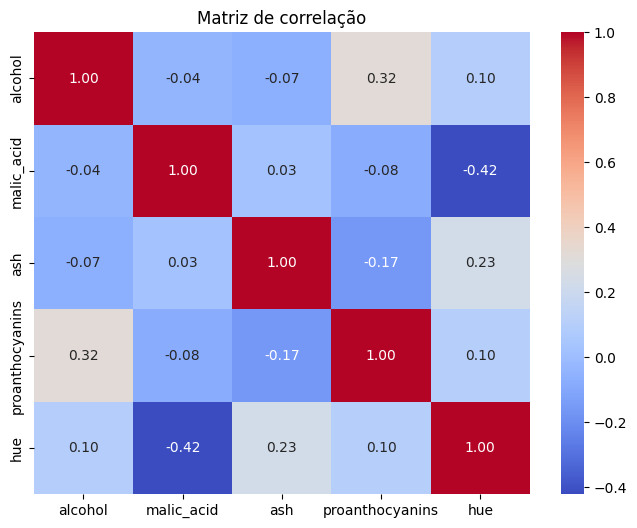

In [ ]:
# Matriz de correlação do cultivar 0
plt.figure(figsize=(8, 6))
sns.heatmap(df_cultivar_0.iloc[:, :5].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação')
plt.show()

### Matriz de correlação de vinhos do cultivar 1

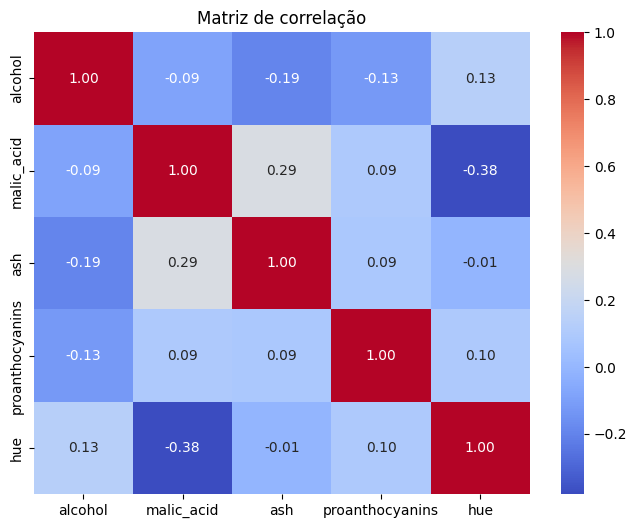

In [ ]:
# Matriz de correlação do cultivar 1
plt.figure(figsize=(8, 6))
sns.heatmap(df_cultivar_1.iloc[:, :5].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação')
plt.show()

### Matriz de correlação de vinhos do cultivar 2

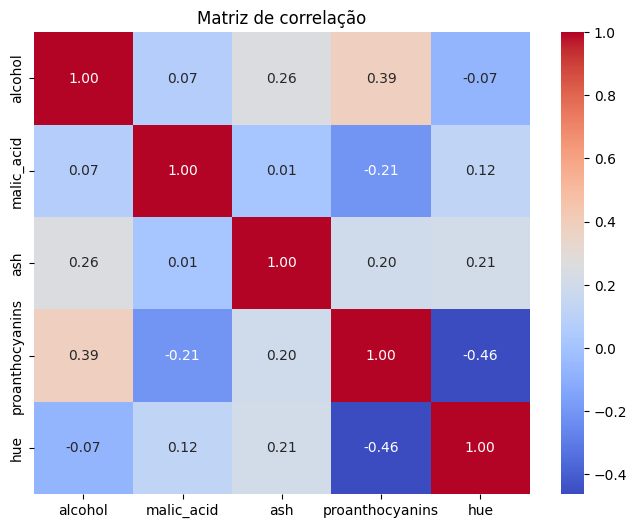

In [ ]:
# Matriz de correlação do cultivar 1
plt.figure(figsize=(8, 6))
sns.heatmap(df_cultivar_2.iloc[:, :5].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação')
plt.show()

Graças a etapa de  one-hot encoding foi possível elaborar uma matriz de correlação para cada cultivar analisado. Com isso reforçamos que as correlações entre as caracteríticas destacadas anteriormente seguem como verdadeiras, uma vez que não variam de acordo com o cultivar analisado.

# Conclusão

As etapas de análise e de pré-processamento do dataset Wine demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset bem estruturado, com características numéricas bem definidas e ausente de valores nulos ou irreais, o que permite uma clara identificação entre os cultivares e reforçando a confiabilidade da amostra.

A análise exploratória nos ilustrou que os cultivares tendem a ter valores distintos para cada uma das características analisadas, o que reforça a capacidade de distingui-los com os dados obtidos a partir do produto final.

Importante destacar a ações tomadas durante a etapa de pré-processamento, uma vez que um tratameto adequado na base de dados utilizada tende a facilitar as análises realizadas, assim como garantir a eficácia de algoritmos durante o fase de aprendizagem.

As três hipóteses levantadas foram validadas:

1.   *O tipo do cultivar interfere no teor alcóolico do vinho?* Sim, levando-se em consideração às análises realizadas, identificou-se que cada cultivar tende a produzir um vinho com teor alcóolico diferente dos demais.

2.   *Algum cultivar se destaca por trazer maior acidez ao vinho?* Sim, uma vez que foi identificado auqe o cultivar class_2 tenede a produzir vinhos com acidez mais elavada que os demais

3.   *Existe uma correlação entre as teor de cinzas e teor de ácido presentes nos vinhos de um mesmo cultivar?* Não, pois com as análises realizadas verificamos que são duas das características que possuem relação mais fraca entre si, levando a crer que são totalemnte distintas.

4. *É possível traçar relação entre os taninos e a intensidae da cor?* Não, as análises realidas não conseguiram determninar um forte relação entre as duas características



